In [1]:
# for getting text data off the web
import requests
import re
import numpy as np
import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

!pip install tiktoken
import tiktoken

Celda 2: Configuración del Tokenizer
Explicación: Cargamos el modelo de tokenización específico de GPT-4 (cl100k_base). Esto nos permitirá cortar el texto exactamente como lo "lee" la IA.

Código:

In [2]:
# GPT-4's tokenizer
tokenizer = tiktoken.get_encoding('cl100k_base')

# Ejercicio 1: Contando ocurrencias en números y letras


Celda 4: Introducción a np.unique
Explicación: Usamos numpy para encontrar valores únicos en una lista de números y contarlos. Nota: He corregido la sintaxis para que np.unique devuelva los conteos correctamente.

Código:

In [3]:
# a quick intro to np.unique
# una introducción rápida a np.unique

nums = np.array([ 1,1,3,2,2,2,9,9,9,-1,-1,-1,-1,-1 ])
uniq, counts = np.unique(nums, return_counts=True)

for n,c in zip(uniq,counts):
    print(f'The number {n} appears {c} times.')

The number -1 appears 5 times.
The number 1 appears 2 times.
The number 2 appears 3 times.
The number 3 appears 1 times.
The number 9 appears 3 times.


Celda 5: Limitaciones con Strings
Explicación: Intentamos usar la misma función con texto crudo. Aquí fallará o no dará el resultado esperado (contar letras individuales), porque np.unique interpreta el string completo como un único elemento si no se convierte en lista primero.

Código:

In [4]:
# also works for strings?
# ¿también funciona para cadenas de texto?
text = 'Hello, my name is Mike and I like to each chocolate.'
np.unique(text) # nope :(

array(['Hello, my name is Mike and I like to each chocolate.'],
      dtype='<U52')

Celda 6: Conteo manual de caracteres
Explicación: Como el método anterior falló, implementamos una solución manual. Creamos un set (conjunto) para obtener los caracteres únicos y luego iteramos para contar cuántas veces aparece cada uno en el texto original.

Código:

In [5]:
# but this works:
# pero esto sí funciona:
uniq = set(text)
counts = np.zeros(len(uniq))

for i,u in enumerate(uniq):
    counts[i] = text.count(u)

# or using list-comprehension
# o usando comprensión de listas
#counts = [ text.count(u) for u in uniq ]

# print out
for n,c in zip(uniq,counts):
    print(f'The letter "{n}" appears {c} times.')

The letter "h" appears 2.0 times.
The letter "m" appears 2.0 times.
The letter "k" appears 2.0 times.
The letter "I" appears 1.0 times.
The letter "l" appears 4.0 times.
The letter "i" appears 3.0 times.
The letter "d" appears 1.0 times.
The letter "c" appears 3.0 times.
The letter "y" appears 1.0 times.
The letter "e" appears 6.0 times.
The letter "a" appears 4.0 times.
The letter "," appears 1.0 times.
The letter "s" appears 1.0 times.
The letter "H" appears 1.0 times.
The letter "M" appears 1.0 times.
The letter " " appears 10.0 times.
The letter "." appears 1.0 times.
The letter "o" appears 4.0 times.
The letter "t" appears 2.0 times.
The letter "n" appears 2.0 times.


# Ejercicio 2: Explorar la ley de Zipf en libros

Celda 8: Análisis de la Ley de Zipf
Explicación: Este es el bucle principal (nota: faltan fragmentos de código que debes completar como ejercicio).

Prepara dos gráficos.

Itera sobre una lista de URLs de libros (bookurls).

Descarga el texto.

Cuenta la frecuencia de caracteres y la grafica.

Tokeniza el texto (usando tokenizer), cuenta la frecuencia de tokens y la grafica.

Ajusta las escalas (probablemente a logarítmicas, ya que es la Ley de Zipf).

Código:

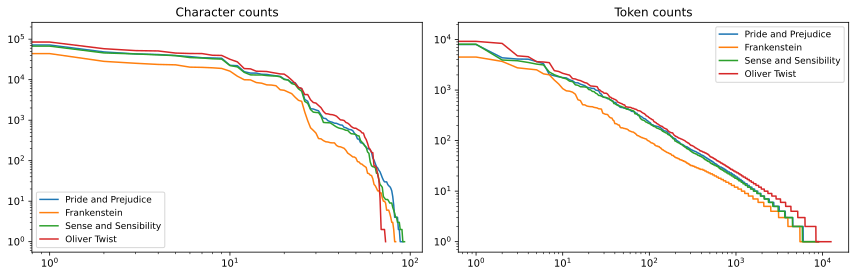

In [7]:
bookurls = [
    (1342, 'Pride and Prejudice'), # Jane Austen
    (84, 'Frankenstein'),        # Mary Shelley
    (161, 'Sense and Sensibility'), # Jane Austen
    (730, 'Oliver Twist')         # Charles Dickens
]

_,axs = plt.subplots(1,2,figsize=(12,4))

for code,title in bookurls:

    # get the text
    # obtener el texto
    url = f'https://www.gutenberg.org/files/{code}/{code}-0.txt'
    response = requests.get(url)
    text = response.text

    # Zipf's law for characters
    # Ley de Zipf para caracteres
    char_counts_dict = {}
    for char in text:
        char_counts_dict[char] = char_counts_dict.get(char, 0) + 1
    counts = np.array(list(char_counts_dict.values()))
    counts = np.sort(counts)[::-1]

    axs[0].plot(counts, label=title)

    # and for tokens
    # y para tokens
    tokens = tokenizer.encode(text) # asumiendo que 'text' ya fue definido
    unitokens, counts = np.unique(tokens, return_counts=True)

    # Es necesario ordenar los counts de mayor a menor para ver la ley de Zipf
    axs[1].plot(np.sort(counts)[::-1], label=title)

# axis adjustments
# ajustes de los ejes
for a in axs:
    a.legend(fontsize=9)
    a.set(xscale='log', yscale='log') # Zipf se ve mejor en escala log-log

axs[0].set_title('Character counts') # Conteo de caracteres
axs[1].set_title('Token counts')     # Conteo de tokens

plt.tight_layout()
plt.show()